In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
data = pd.read_csv('/content/Crime_Data_from_2020_to_Present.csv')

In [ ]:
data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [ ]:
df = data.copy()

In [ ]:
# Convert DATE OCC and Date Rptd columns to datetime
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce')

<ipython-input-5-bbecccc68be3>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')
<ipython-input-5-bbecccc68be3>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce')


In [ ]:
# Extract relevant time components
df['Hour'] = df['TIME OCC'] // 100  # Extract hour from TIME OCC
df['DayOfWeek'] = df['DATE OCC'].dt.day_name()  # Day of the week
df['MonthYear'] = df['DATE OCC'].dt.to_period('M')  # Month-Year for trends
df['Year'] = df['DATE OCC'].dt.year

In [ ]:
df['DATE OCC'].value_counts()

,count
DATE OCC,
2020-01-01,1163
2023-01-01,1157
2022-12-02,1132
2023-02-01,1093
2022-10-01,1079
...,...
2024-12-17,71
2024-12-18,69
2024-12-19,59


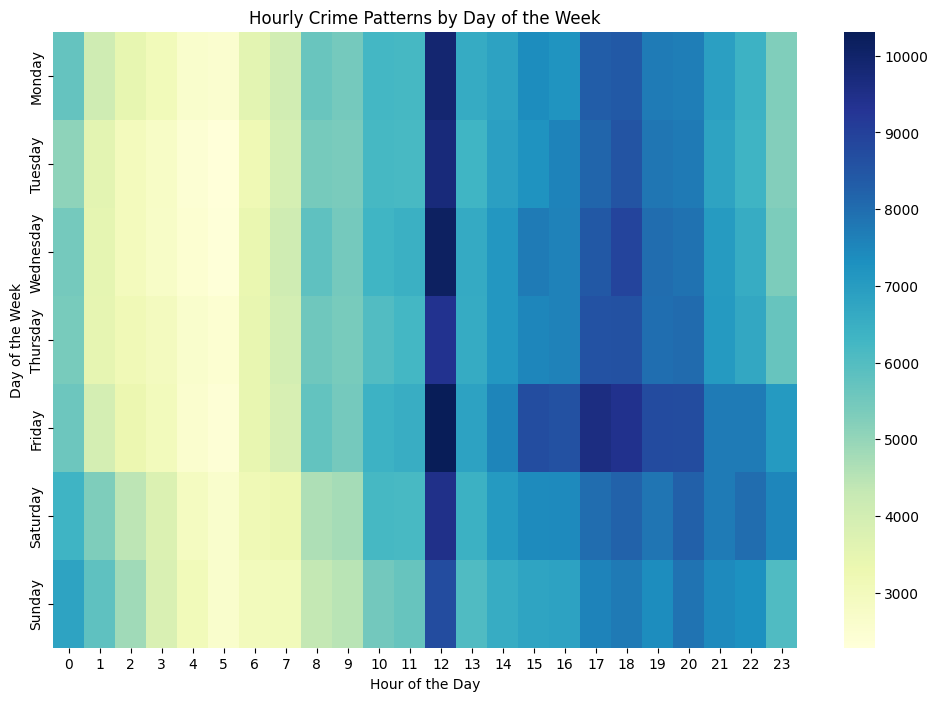

In [ ]:
# --- Visualization 1: Heatmap for Hourly and Weekly Patterns ---
heatmap_data = df.groupby(['DayOfWeek', 'Hour']).size().reset_index(name='Crime Count')
heatmap_data = heatmap_data.pivot(index='DayOfWeek', columns='Hour', values='Crime Count')

# Ensure the days of the week are ordered correctly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu')  # `annot=True` displays values, `fmt='g'` for integer formatting
plt.title('Hourly Crime Patterns by Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

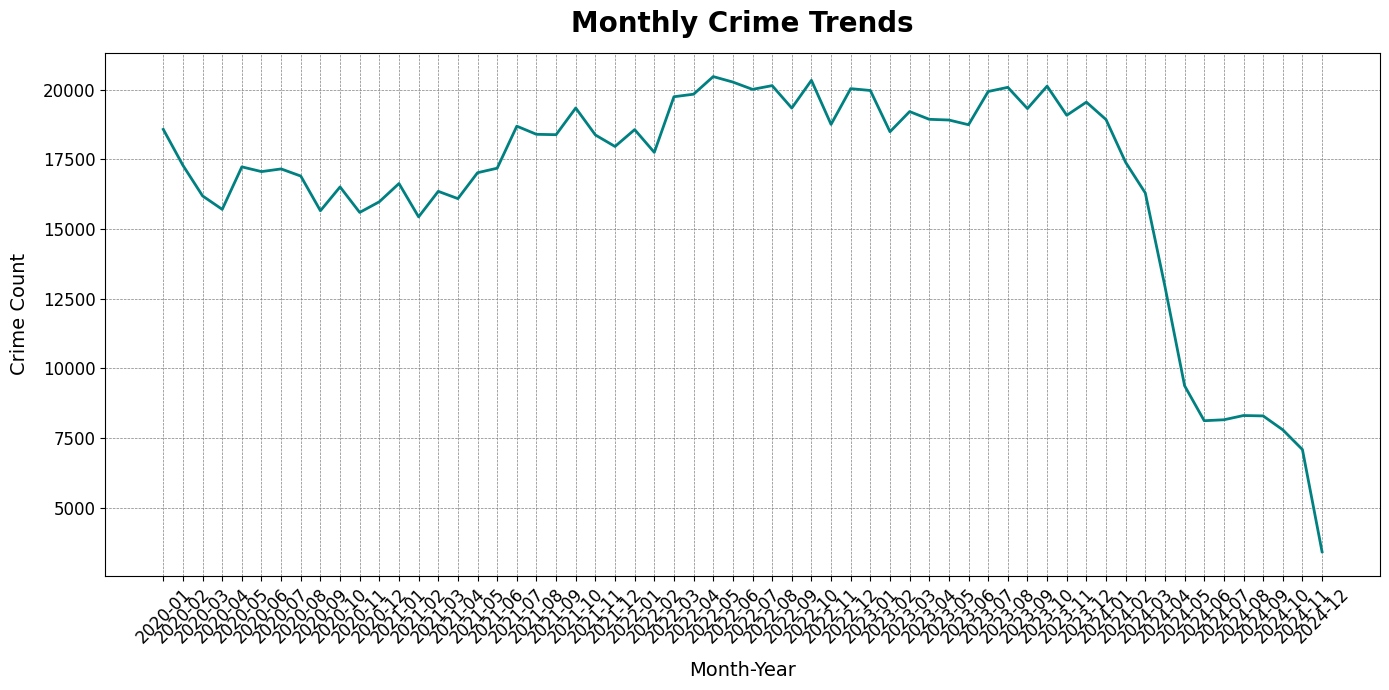

In [ ]:
monthly_trends = df.groupby('MonthYear').size().reset_index(name='Crime Count')

plt.figure(figsize=(14, 7))  # Increase the figure size
plt.plot(
    monthly_trends['MonthYear'].astype(str),
    monthly_trends['Crime Count'],
    color='teal',  # Line color
    linestyle='-',  # Line style
    linewidth=2,    # Line thickness
    markersize=8,   # Marker size
    markerfacecolor='orange',  # Marker face color
    markeredgecolor='black',   # Marker edge color
)

# Customize axis labels and title
plt.title('Monthly Crime Trends', fontsize=20, fontweight='bold', pad=15)
plt.xlabel('Month-Year', fontsize=14, labelpad=10)
plt.ylabel('Crime Count', fontsize=14, labelpad=10)

# Customize ticks
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5, color='gray')

# Add a tight layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-10-6dd848154319>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_trends, x='Year', y='Crime Count', palette='viridis')


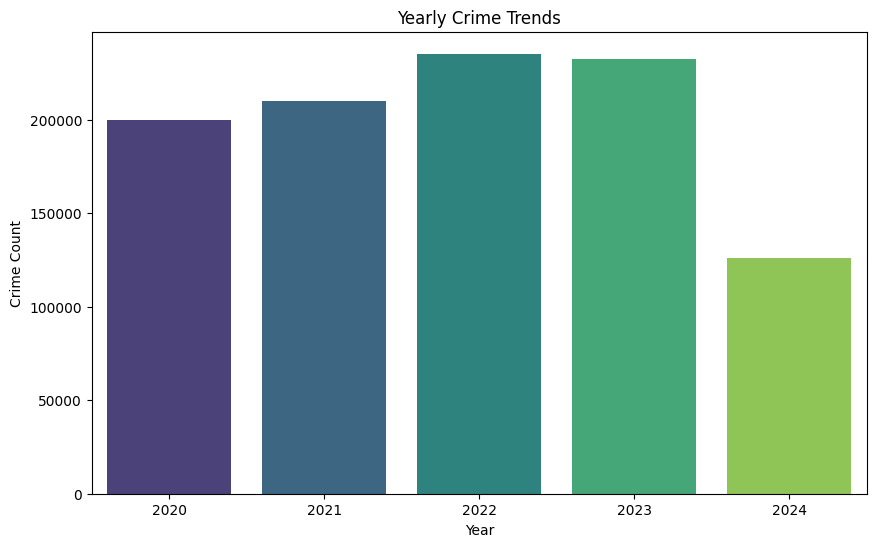

In [ ]:
# --- Visualization 3: Bar Chart for Yearly Trends ---
yearly_trends = df.groupby('Year').size().reset_index(name='Crime Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_trends, x='Year', y='Crime Count', palette='viridis')
plt.title('Yearly Crime Trends')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.show()

In [ ]:
df = df.dropna(subset=['LAT', 'LON'])
df['Crm Cd Desc'] = df['Crm Cd Desc'].fillna('Unknown')

In [ ]:
choropleth_data = df.groupby('AREA NAME').size().reset_index(name='Crime Count')
print(choropleth_data.head())

     AREA NAME  Crime Count
0  77th Street        61703
1      Central        69548
2   Devonshire        41689
3     Foothill        33098
4       Harbor        41311


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Crime_Data_from_2020_to_Present.csv')

In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


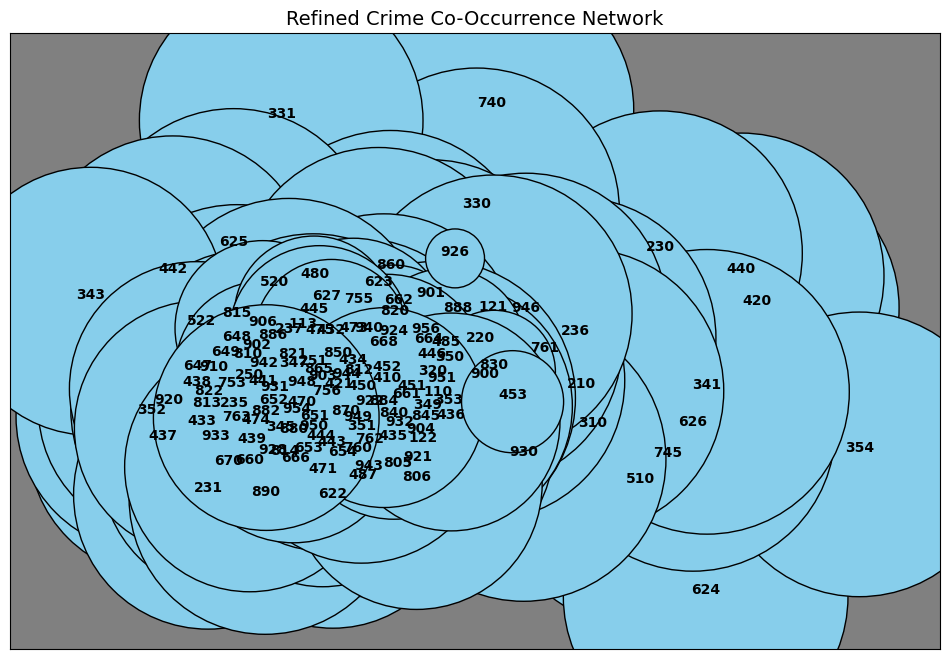

In [ ]:
# Rewriting the Crime Co-Occurrence Network visualization for better clarity

# Create a new Graph
G1 = nx.Graph()

# Build the graph with better structure
location_groups = df.groupby("LOCATION")["Crm Cd"].apply(list)
for crimes in location_groups:
    for i in range(len(crimes)):
        for j in range(i + 1, len(crimes)):
            if G1.has_edge(crimes[i], crimes[j]):
                G1[crimes[i]][crimes[j]]['weight'] += 1
            else:
                G1.add_edge(crimes[i], crimes[j], weight=1)

# Compute node sizes based on degree (importance in network)
node_sizes = [G1.degree(n) * 300 for n in G1.nodes()]

# Compute edge thickness based on weight
edge_weights = [G1[u][v]['weight'] for u, v in G1.edges()]

# Use Kamada-Kawai layout for better spacing
pos = nx.kamada_kawai_layout(G1)

# Plot the improved network
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G1, pos, node_size=node_sizes, node_color="skyblue", edgecolors="black")
nx.draw_networkx_edges(G1, pos, width=edge_weights, edge_color="gray", alpha=0.7)
nx.draw_networkx_labels(G1, pos, font_size=10, font_weight="bold", verticalalignment='bottom')

# Title and display
plt.title("Refined Crime Co-Occurrence Network", fontsize=14)
plt.show()


In [ ]:
def stratified_sample_df(df, col, n_samples):
    n = min(n_samples, df[col].value_counts().min())
    df_ = df.groupby(col).apply(lambda x: x.sample(n))
    df_.index = df_.index.droplevel(0)
    return df_

In [ ]:
data = stratified_sample_df(df, 'Crm Cd', 3000)

<ipython-input-11-f7ae7a42eb38>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ = df.groupby(col).apply(lambda x: x.sample(n))


In [ ]:
data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
482880,221012187,07/30/2022 12:00:00 AM,07/29/2022 12:00:00 AM,50,10,West Valley,1004,1,110,CRIMINAL HOMICIDE,...,AA,Adult Arrest,110.0,998.0,NaN,NaN,18300 SATICOY ST,NaN,34.2146,-118.5317
355357,210816660,12/15/2021 12:00:00 AM,12/15/2021 12:00:00 AM,1230,7,Wilshire,722,1,113,"MANSLAUGHTER, NEGLIGENT",...,AA,Adult Arrest,113.0,998.0,NaN,NaN,100 N CROFT AV,NaN,34.0745,-118.3742
334491,210104293,01/07/2021 12:00:00 AM,01/07/2021 12:00:00 AM,1630,1,Central,182,1,121,"RAPE, FORCIBLE",...,AO,Adult Other,121.0,998.0,NaN,NaN,11TH ST,HOPE ST,34.0423,-118.2630
148579,201401075,12/12/2020 12:00:00 AM,12/12/2020 12:00:00 AM,1600,14,Pacific,1431,1,122,"RAPE, ATTEMPTED",...,AA,Adult Arrest,122.0,998.0,NaN,NaN,2000 S STRONGS DR,NaN,33.9862,-118.4704
46979,200618931,12/07/2020 12:00:00 AM,12/07/2020 12:00:00 AM,1300,6,Hollywood,645,1,210,ROBBERY,...,AO,Adult Other,210.0,761.0,901.0,930.0,1400 N HIGHLAND AV,NaN,34.1006,-118.3417


In [ ]:
data.to_csv('crime_data.csv', index=False)

In [ ]:

# Location-Based Crime Network
G2 = nx.Graph()

# Create edges based on locations sharing the same crime type
crime_groups = df.groupby("Crime Type")["Location"].apply(list)
for locs in crime_groups:
    for i in range(len(locs)):
        for j in range(i + 1, len(locs)):
            if G2.has_edge(locs[i], locs[j]):
                G2[locs[i]][locs[j]]['weight'] += 1
            else:
                G2.add_edge(locs[i], locs[j], weight=1)

# Plot Location-Based Crime Network
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G2, seed=42)
nx.draw(G2, pos, with_labels=True, node_size=2000, node_color="lightcoral", edge_color="gray", font_size=8, font_weight="bold")
plt.title("Location-Based Crime Network")
plt.show()

In [ ]:

df_uploaded = df.copy()

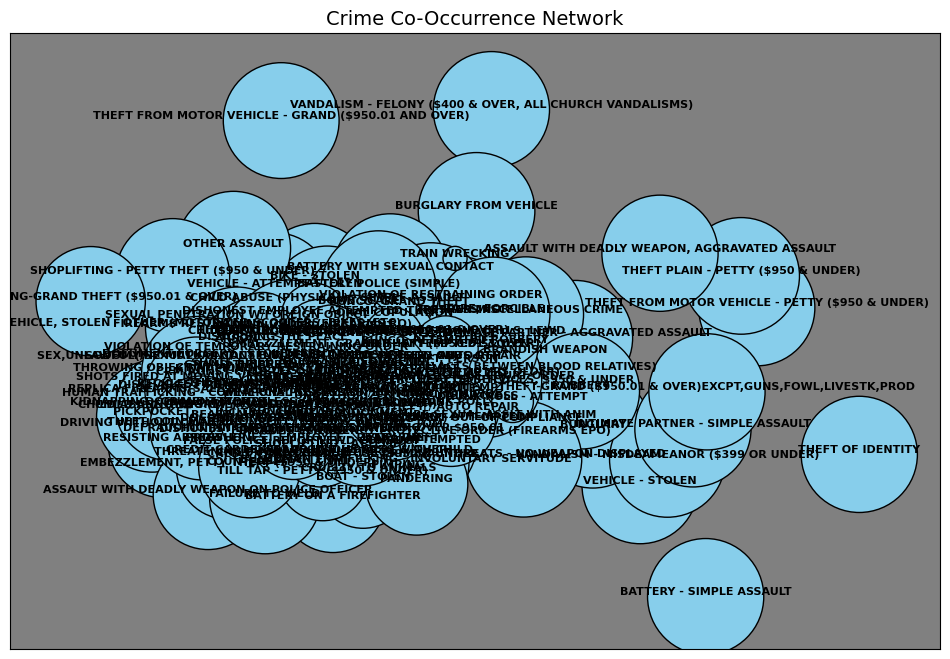

KeyboardInterrupt: 

In [ ]:
# Create the Crime Co-Occurrence Network

# Initialize graph
G1 = nx.Graph()

# Group data by location and extract crime types
location_groups = df_uploaded.groupby("LOCATION")["Crm Cd Desc"].apply(list)

# Build edges based on co-occurrence of crimes at the same location
for crimes in location_groups:
    for i in range(len(crimes)):
        for j in range(i + 1, len(crimes)):
            if G1.has_edge(crimes[i], crimes[j]):
                G1[crimes[i]][crimes[j]]['weight'] += 1
            else:
                G1.add_edge(crimes[i], crimes[j], weight=1)

# Compute node sizes based on degree (number of connections)
node_sizes = [G1.degree(n) * 50 for n in G1.nodes()]

# Compute edge thickness based on weight
edge_weights = [G1[u][v]['weight'] for u, v in G1.edges()]

# Use Kamada-Kawai layout for better spacing
pos = nx.kamada_kawai_layout(G1)

# Plot the refined Crime Co-Occurrence Network
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G1, pos, node_size=node_sizes, node_color="skyblue", edgecolors="black")
nx.draw_networkx_edges(G1, pos, width=edge_weights, edge_color="gray", alpha=0.7)
nx.draw_networkx_labels(G1, pos, font_size=8, font_weight="bold", verticalalignment='bottom')

# Title and display
plt.title("Crime Co-Occurrence Network", fontsize=14)
plt.show()

# Create the Location-Based Crime Network

# Initialize graph
G2 = nx.Graph()

# Group data by crime type and extract locations
crime_groups = df_uploaded.groupby("Crm Cd Desc")["LOCATION"].apply(list)

# Build edges based on shared crime types across locations
for locs in crime_groups:
    for i in range(len(locs)):
        for j in range(i + 1, len(locs)):
            if G2.has_edge(locs[i], locs[j]):
                G2[locs[i]][locs[j]]['weight'] += 1
            else:
                G2.add_edge(locs[i], locs[j], weight=1)

# Compute node sizes based on degree (number of connections)
node_sizes = [G2.degree(n) * 50 for n in G2.nodes()]

# Compute edge thickness based on weight
edge_weights = [G2[u][v]['weight'] for u, v in G2.edges()]

# Use Kamada-Kawai layout for better spacing
pos = nx.kamada_kawai_layout(G2)

# Plot the refined Location-Based Crime Network
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G2, pos, node_size=node_sizes, node_color="lightcoral", edgecolors="black")
nx.draw_networkx_edges(G2, pos, width=edge_weights, edge_color="gray", alpha=0.7)
nx.draw_networkx_labels(G2, pos, font_size=8, font_weight="bold", verticalalignment='bottom')

# Title and display
plt.title("Location-Based Crime Network", fontsize=14)
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Prepare data for the Enclosure Tree (Sunburst Chart)
df_tree = df_uploaded.groupby(["Crm Cd Desc", "LOCATION"]).size().reset_index(name="Count")

# Create the Sunburst Chart
fig = px.sunburst(df_tree,
                  path=["Crm Cd Desc", "LOCATION"],  # Hierarchical path
                  values="Count",  # Size based on occurrence count
                  title="Crime Enclosure Tree (Sunburst Chart)",
                  color="Crm Cd Desc",
                  color_discrete_sequence=px.colors.qualitative.Set3)

# Show the interactive Enclosure Tree
fig.show()